In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [38]:
alc_df = pd.read_csv("Resources/heavy_drinking_data.csv")
alc_df = alc_df.rename(columns={"REF_DATE":"Year","GEO":"Country","VALUE":"Number of People"})
alc_df= alc_df[["Year","Country","Age group","Indicators","Characteristics","Number of People"]]
clean_alc_df = alc_df.loc[alc_df["Characteristics"]=="Number of persons",:]
clean_alc_df

,Year,Country,Age group,Indicators,Characteristics,Number of People
0,2015,Canada (excluding territories),"Total, 12 years and over",Heavy drinking,Number of persons,5782800.0
1,2016,Canada (excluding territories),"Total, 12 years and over",Heavy drinking,Number of persons,5770900.0
2,2017,Canada (excluding territories),"Total, 12 years and over",Heavy drinking,Number of persons,6015500.0
3,2018,Canada (excluding territories),"Total, 12 years and over",Heavy drinking,Number of persons,5946400.0
8,2015,Canada (excluding territories),12 to 17 years,Heavy drinking,Number of persons,90600.0
9,2016,Canada (excluding territories),12 to 17 years,Heavy drinking,Number of persons,87900.0
10,2017,Canada (excluding territories),12 to 17 years,Heavy drinking,Number of persons,94300.0
11,2018,Canada (excluding territories),12 to 17 years,Heavy drinking,Number of persons,77100.0
16,2015,Canada (excluding territories),18 to 34 years,Heavy drinking,Number of persons,2469000.0
17,2016,Canada (excluding territories),18 to 34 years,Heavy drinking,Number of persons,2341200.0


In [39]:
total =clean_alc_df.loc[clean_alc_df["Age group"]=="Total, 12 years and over",:]
total = total[["Year","Number of People"]]
total

,Year,Number of People
0,2015,5782800.0
1,2016,5770900.0
2,2017,6015500.0
3,2018,5946400.0


In [40]:
reduced_alc_df = clean_alc_df.loc[clean_alc_df["Age group"]!="Total, 12 years and over",:].drop(columns=["Characteristics"])
reduced_alc_df

,Year,Country,Age group,Indicators,Number of People
8,2015,Canada (excluding territories),12 to 17 years,Heavy drinking,90600.0
9,2016,Canada (excluding territories),12 to 17 years,Heavy drinking,87900.0
10,2017,Canada (excluding territories),12 to 17 years,Heavy drinking,94300.0
11,2018,Canada (excluding territories),12 to 17 years,Heavy drinking,77100.0
16,2015,Canada (excluding territories),18 to 34 years,Heavy drinking,2469000.0
17,2016,Canada (excluding territories),18 to 34 years,Heavy drinking,2341200.0
18,2017,Canada (excluding territories),18 to 34 years,Heavy drinking,2417900.0
19,2018,Canada (excluding territories),18 to 34 years,Heavy drinking,2361800.0
24,2015,Canada (excluding territories),35 to 49 years,Heavy drinking,1459200.0
25,2016,Canada (excluding territories),35 to 49 years,Heavy drinking,1530500.0


In [41]:
elderly = reduced_alc_df.loc[(reduced_alc_df["Age group"]=="50 to 64 years")|(reduced_alc_df["Age group"]=="65 years and over"),:]
elderly["Age group"] = elderly["Age group"].replace({"50 to 64 years":"50 to 65+ years","65 years and over":"50 to 65+ years"})
elderly_total = elderly.groupby(["Year","Age group"]).sum()
elderly_total = elderly_total.reset_index()
elderly_total

<ipython-input-41-0cdf489fc1f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elderly["Age group"] = elderly["Age group"].replace({"50 to 64 years":"50 to 65+ years","65 years and over":"50 to 65+ years"})


,Year,Age group,Number of People
0,2015,50 to 65+ years,1764000.0
1,2016,50 to 65+ years,1811400.0
2,2017,50 to 65+ years,1866600.0
3,2018,50 to 65+ years,1874400.0


In [42]:
groupby_df = reduced_alc_df.groupby(["Year","Age group"]).sum()
reset_groupby_df = groupby_df.reset_index()
drop_elderly = reset_groupby_df.loc[(reset_groupby_df["Age group"]!="50 to 64 years")&(reset_groupby_df["Age group"]!="65 years and over")]
final_df=drop_elderly.append(elderly_total).reset_index().drop(columns=["index"])
final_df

,Year,Age group,Number of People
0,2015,12 to 17 years,90600.0
1,2015,18 to 34 years,2469000.0
2,2015,35 to 49 years,1459200.0
3,2016,12 to 17 years,87900.0
4,2016,18 to 34 years,2341200.0
5,2016,35 to 49 years,1530500.0
6,2017,12 to 17 years,94300.0
7,2017,18 to 34 years,2417900.0
8,2017,35 to 49 years,1636700.0
9,2018,12 to 17 years,77100.0


In [43]:
groupby_df = final_df.groupby(["Year","Age group"]).sum()
test = groupby_df.reset_index()
alc_df = pd.merge(test,total,on="Year",how="inner")
alc_df = alc_df.rename(columns={"Number of People_x":"Number of People","Number of People_y":"Total Classified as Heavy Drinkers"})
alc_df["Percent of age group"] = round((alc_df["Number of People"]/alc_df["Total Classified as Heavy Drinkers"])*100,2)
alc_df

,Year,Age group,Number of People,Total Classified as Heavy Drinkers,Percent of age group
0,2015,12 to 17 years,90600.0,5782800.0,1.57
1,2015,18 to 34 years,2469000.0,5782800.0,42.70
2,2015,35 to 49 years,1459200.0,5782800.0,25.23
3,2015,50 to 65+ years,1764000.0,5782800.0,30.50
4,2016,12 to 17 years,87900.0,5770900.0,1.52
5,2016,18 to 34 years,2341200.0,5770900.0,40.57
6,2016,35 to 49 years,1530500.0,5770900.0,26.52
7,2016,50 to 65+ years,1811400.0,5770900.0,31.39
8,2017,12 to 17 years,94300.0,6015500.0,1.57
9,2017,18 to 34 years,2417900.0,6015500.0,40.19


In [44]:
teens = alc_df.loc[alc_df["Age group"]== "12 to 17 years"]
young_adults = alc_df.loc[alc_df["Age group"]=="18 to 34 years"]
mid_adults = alc_df.loc[alc_df["Age group"]=="35 to 49 years"]
older_adults= alc_df.loc[alc_df["Age group"]=="50 to 65+ years"]
w=0.15
x=["2015","2016","2017","2018"]
bar1=np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]



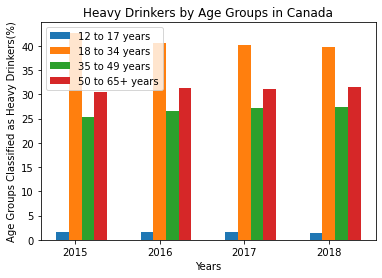

In [45]:
plt.bar(bar1,teens["Percent of age group"],w,label="12 to 17 years")
plt.bar(bar2,young_adults["Percent of age group"],w,label="18 to 34 years")
plt.bar(bar3,mid_adults["Percent of age group"],w,label="35 to 49 years")
plt.bar(bar4,older_adults["Percent of age group"],w,label="50 to 65+ years")
plt.legend(loc="best")
plt.xticks(bar1+w,x)
plt.ylabel("Age Groups Classified as Heavy Drinkers(%)")
plt.xlabel("Years")
plt.title("Heavy Drinkers by Age Groups in Canada")
plt.show()

In [46]:
cannibis_df = pd.read_csv("Resources/cannabis_usage_1961_2018.csv")
cannibis_df = cannibis_df.rename(columns={"REF_DATE":"Year","VALUE":"Value"})
cannibis_df.columns

Index(['Year', 'GEO', 'DGUID', 'Prevalence', 'Age group', 'Frequency of use',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'Value', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [47]:
clean_can_df = cannibis_df[["Year","Prevalence","Age group","Frequency of use","Value"]]
clean_can_df

,Year,Prevalence,Age group,Frequency of use,Value
0,1961,Consuming population of cannabis,15 years and over,"Total, all frequencies",277512.0
1,1961,Consuming population of cannabis,15 years and over,Once,17616.0
2,1961,Consuming population of cannabis,15 years and over,Less than once per month,97880.0
3,1961,Consuming population of cannabis,15 years and over,One to three times per month,51722.0
4,1961,Consuming population of cannabis,15 years and over,At least once a week (excludes daily),70428.0
...,...,...,...,...,...
4171,2018,Volume of cannabis consumed,65 years and over,Once,NaN
4172,2018,Volume of cannabis consumed,65 years and over,Less than once per month,NaN
4173,2018,Volume of cannabis consumed,65 years and over,One to three times per month,NaN
4174,2018,Volume of cannabis consumed,65 years and over,At least once a week (excludes daily),NaN


In [48]:
reduced_can_df = clean_can_df.loc[(clean_can_df["Year"]>=2015)&
                                 (clean_can_df["Prevalence"]=="Consuming population of cannabis")&
                                 (clean_can_df["Age group"]!="65 years and over")&
                                 (clean_can_df["Frequency of use"]=="Total, all frequencies"),: ]

In [49]:
reduced_can_df
total_df = reduced_can_df.loc[reduced_can_df["Age group"]=="15 years and over",["Year","Value"]]
total_df

,Year,Value
3888,2015,4540920.0
3960,2016,4701240.0
4032,2017,4876544.0
4104,2018,5034949.0


In [50]:
can_groupby_df = reduced_can_df.groupby(["Year","Age group"]).sum()
test = can_groupby_df.reset_index()
merge_can = pd.merge(test,total_df,on="Year",how="outer")
cannabis_df = merge_can.rename(columns={"Value_x":"Cannabis Consumers","Value_y":"Total Cannabis Consumers"})
cannabis_df["Percent of age group"] = round((cannabis_df["Cannabis Consumers"]/cannabis_df["Total Cannabis Consumers"])*100,2)
cannabis_df=cannabis_df.loc[cannabis_df["Age group"]!="15 years and over"].reset_index().drop(columns="index")
cannabis_df


,Year,Age group,Cannabis Consumers,Total Cannabis Consumers,Percent of age group
0,2015,15 to 17 years,278713.0,4540920.0,6.14
1,2015,18 to 24 years,1266915.0,4540920.0,27.90
2,2015,25 to 44 years,1929152.0,4540920.0,42.48
3,2015,45 to 64 years,1066141.0,4540920.0,23.48
4,2016,15 to 17 years,284263.0,4701240.0,6.05
5,2016,18 to 24 years,1300556.0,4701240.0,27.66
6,2016,25 to 44 years,2013181.0,4701240.0,42.82
7,2016,45 to 64 years,1103239.0,4701240.0,23.47
8,2017,15 to 17 years,291277.0,4876544.0,5.97
9,2017,18 to 24 years,1341678.0,4876544.0,27.51


In [51]:
teen = cannabis_df.loc[(cannabis_df["Age group"]!= "25 to 44 years") & (cannabis_df["Age group"]!= "18 to 24 years") & (cannabis_df["Age group"]!= "45 to 64 years"),: ]
young_adults = cannabis_df.loc[cannabis_df["Age group"]=="18 to 24 years"]
mid_adults = cannabis_df.loc[cannabis_df["Age group"]=="25 to 44 years"]
older_adults= cannabis_df.loc[cannabis_df["Age group"]=="45 to 64 years"]
w=0.2
x=["2015","2016","2017","2018"]
bar1=np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]

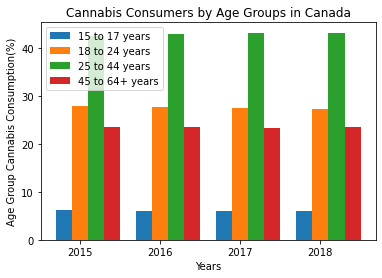

In [52]:
plt.bar(bar1,teen["Percent of age group"],w,label="15 to 17 years")
plt.bar(bar2,young_adults["Percent of age group"],w,label="18 to 24 years")
plt.bar(bar3,mid_adults["Percent of age group"],w,label="25 to 44 years")
plt.bar(bar4,older_adults["Percent of age group"],w,label="45 to 64+ years")
plt.legend(loc="best")
plt.xticks(bar1+w,x)
plt.ylabel("Age Group Cannabis Consumption(%)")
plt.xlabel("Years")
plt.title("Cannabis Consumers by Age Groups in Canada")
plt.show()

In [53]:
df3= pd.read_csv("Resources/can_pop_15_19.csv")
df3

,REF_DATE,GEO,DGUID,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2015,Canada,2016A000011124,Both sexes,All ages,Persons,249,units,0,v466668,1.1.1,35702908.0,NaN,NaN,NaN,0
1,2016,Canada,2016A000011124,Both sexes,All ages,Persons,249,units,0,v466668,1.1.1,36109487.0,NaN,NaN,NaN,0
2,2017,Canada,2016A000011124,Both sexes,All ages,Persons,249,units,0,v466668,1.1.1,36545295.0,NaN,NaN,NaN,0
3,2018,Canada,2016A000011124,Both sexes,All ages,Persons,249,units,0,v466668,1.1.1,37065178.0,NaN,NaN,NaN,0
4,2019,Canada,2016A000011124,Both sexes,All ages,Persons,249,units,0,v466668,1.1.1,37593384.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2015,Canada,2016A000011124,Both sexes,Median age,Years,308,units,0,v466689,1.1.105,40.7,NaN,NaN,NaN,1
111,2016,Canada,2016A000011124,Both sexes,Median age,Years,308,units,0,v466689,1.1.105,40.7,NaN,NaN,NaN,1
112,2017,Canada,2016A000011124,Both sexes,Median age,Years,308,units,0,v466689,1.1.105,40.8,NaN,NaN,NaN,1
113,2018,Canada,2016A000011124,Both sexes,Median age,Years,308,units,0,v466689,1.1.105,40.8,NaN,NaN,NaN,1


In [54]:
df3.columns
df3 = df3[['REF_DATE','Age group','VALUE']]
df4= df3.rename(columns={"REF_DATE":"Year","VALUE":"Total pop"})
df4

,Year,Age group,Total pop
0,2015,All ages,35702908.0
1,2016,All ages,36109487.0
2,2017,All ages,36545295.0
3,2018,All ages,37065178.0
4,2019,All ages,37593384.0
...,...,...,...
110,2015,Median age,40.7
111,2016,Median age,40.7
112,2017,Median age,40.8
113,2018,Median age,40.8


In [55]:
reduced_pop = df4.loc[(df4["Year"]!=2019)&
                     (df4["Age group"]!="Median age")&
                     (df4["Age group"]=="All ages"),:]
merge2_df = pd.merge(reduced_pop,total_df,on="Year",how="outer")
merge3_df = pd.merge(merge2_df,total,on="Year",how="outer")
merge3_df = merge3_df.rename(columns={"Value":"Cannabis Consumers","Number of People":"Heavy Drinkers"})
merge3_df

,Year,Age group,Total pop,Cannabis Consumers,Heavy Drinkers
0,2015,All ages,35702908.0,4540920.0,5782800.0
1,2016,All ages,36109487.0,4701240.0,5770900.0
2,2017,All ages,36545295.0,4876544.0,6015500.0
3,2018,All ages,37065178.0,5034949.0,5946400.0


In [56]:
merge3_df["Cannabis Consumers Population (%)"] = round((merge3_df["Cannabis Consumers"]/merge3_df["Total pop"])*100,2)
merge3_df["Heavy Drinkers Population (%)"] = round((merge3_df["Heavy Drinkers"]/merge3_df["Total pop"])*100,2)
merge3_df

,Year,Age group,Total pop,Cannabis Consumers,Heavy Drinkers,Cannabis Consumers Population (%),Heavy Drinkers Population (%)
0,2015,All ages,35702908.0,4540920.0,5782800.0,12.72,16.20
1,2016,All ages,36109487.0,4701240.0,5770900.0,13.02,15.98
2,2017,All ages,36545295.0,4876544.0,6015500.0,13.34,16.46
3,2018,All ages,37065178.0,5034949.0,5946400.0,13.58,16.04


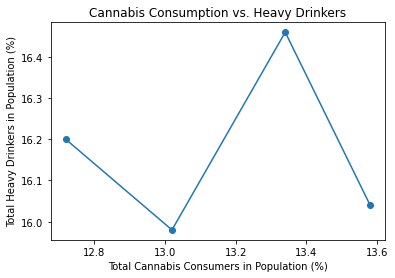

In [57]:
plt.plot(merge3_df["Cannabis Consumers Population (%)"],merge3_df["Heavy Drinkers Population (%)"],marker='o')
plt.ylabel("Total Heavy Drinkers in Population (%)")
plt.xlabel("Total Cannabis Consumers in Population (%)")
plt.title("Cannabis Consumption vs. Heavy Drinkers")
plt.show()

In [59]:
cc = sts.pearsonr(merge3_df["Cannabis Consumers Population (%)"],merge3_df["Heavy Drinkers Population (%)"])

In [60]:
cc

(0.04558777322958976, 0.9544122267704103)